In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv("/content/titanic.csv")
data

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.sample(3) #3 random records

In [ ]:
data.info()

In [ ]:
## Access Columns
data[["Name","Age"]]

In [ ]:
## Access Rows
data.iloc[10:21]
data.iloc[[10,12,19]]

In [ ]:
data.iloc[10:21,2:6]     ## rows,colns

In [ ]:
data.iloc[10:21,[2,5,7]]

In [ ]:
data.iloc[10:21][["Age","Name","Parch"]]

In [ ]:
### Missing values

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
### Dropping missing values

In [ ]:
data.shape

(891, 12)

In [ ]:
df = data.dropna(axis=0)
df.shape

(183, 12)

In [ ]:
df = data.dropna(axis = 1)
df.shape

(891, 9)

In [ ]:
df = data.dropna(axis=0,how='any')
df.shape

(183, 12)

In [ ]:
df = data.dropna(axis=0,how='all')
df.shape

(891, 12)

In [ ]:
df = data.dropna(axis=0,how='any',subset=["Age"])
df.shape

(714, 12)

In [ ]:
### Filling missing values
data.isnull().sum() #before editing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
mean_age = np.round(data['Age'].mean(),2)
data['Age'] = data['Age'].fillna(mean_age)

In [ ]:
data['Cabin'] = data['Cabin'].fillna("NA")
data['Embarked'] = data['Embarked'].fillna("NA")

In [ ]:
data.isnull().sum() #after editing

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
### Delete/Drop any column or row from the dataframe

In [ ]:
### delete row
df = data.drop([1,4],axis=0)
df.head()

In [ ]:
### delete columns
df = data.drop(["Name","PassengerId"],axis=1)
df.head()

In [ ]:
data.head()

In [ ]:
### Filter Data

In [ ]:
filter1 = data["Age"] == 50
filter2 = data["Pclass"] == 1
data[filter1 & filter2]

In [ ]:
data[filter1 | filter2]

In [ ]:
#Unique data of any column
data['Pclass'].unique

<bound method Series.unique of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

In [ ]:
## Count of unique values
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

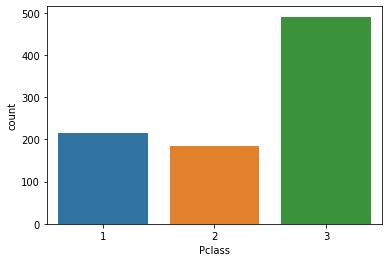

In [ ]:
import seaborn as sns
sns.countplot(x=data['Pclass']);

In [ ]:
data.sort_values(['Age'],ascending=True)

In [ ]:
df = data.sort_values(['Name'],ascending=True)
df = df.reset_index()
df = df.drop(['index'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NA,S
1,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NA,S
2,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NA,S
3,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NA,C
4,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NA,C


In [ ]:
df = data.sort_values(['Name'],ascending=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NA,S
1,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NA,S
2,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NA,S
3,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NA,C
4,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NA,C


In [ ]:
data.to_csv("my_data.csv")    ## export csv

**Feature Encoding** - Converting String Categorical Data into Numerical Data

Types of Data:
1. Nominal Data - Which don't have any rank or order. Ex - Gender - One Hot Encoding
2. Ordinal Data - Which have some rank or order. Ex - Degree - Label Encoding

In [ ]:
data.head()

In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 'NA'], dtype=object)

In [ ]:
### One Hot Encoding
gender = pd.get_dummies(data['Sex'])
gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [ ]:
data = pd.concat([data,gender],axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,1


In [ ]:
### Label Encoding
data['Embark_new'] = data['Embarked'].map({"NA":0,"Q":1,"C":2,"S":3})
data.head()

In [ ]:
## Feature Scaling / Normalization
x = data[['Age','Fare']]
x.head()

In [ ]:
x.describe

<bound method NDFrame.describe of       Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888  29.7  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]>

In [ ]:
### STandard Scaler - Mean=0 and std=1 (Z-score)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

In [ ]:
x.describe()

,0,1
count,8.910000e+02,8.910000e+02
mean,-7.177199e-17,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.253169e+00,-6.484217e-01
25%,-5.924941e-01,-4.891482e-01
50%,5.441217e-05,-3.573909e-01
75%,4.079125e-01,-2.424635e-02
max,3.870858e+00,9.667167e+00


In [ ]:
## MinMaxScalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(-5,5))
x = mms.fit_transform(x)
x = pd.DataFrame(x)
x.head()

In [ ]:
x.describe()

,0,1
count,891.000000,891.000000
mean,-1.320772,-4.371416
std,1.633830,0.969951
min,-5.000000,-5.000000
25%,-2.288263,-4.845599
50%,-1.320684,-4.717873
75%,-0.654687,-4.394920
max,5.000000,5.000000


**Detect Outliers**
1. Using Scatter Plot
2. Using Box Plot
3. Using Z-Score
4. Using IQR - Inter Quantile Range

In [ ]:
samples = [10,20,12,25,50,34,23,40,45,60,22,21,34,23,33,
           10,20,12,25,50,34,23,40,45,60,22,21,34,23,33,
           10,20,12,25,50,34,23,90,45,60,22,21,34,23,33,
           10,20,100,25,50,34,23,40,45,60,22,21,34,23,33,
           10,20,12,25,50,34,23,40,45,60,22,21,34,23,33,
           10,20,12,25,50,34,23,40,45,60,22,21,34,23,33,-100,-90]

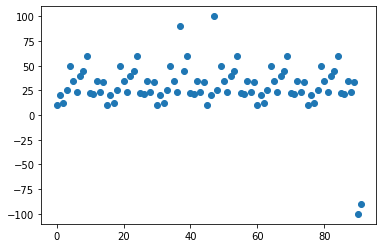

In [ ]:
### Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns


plt.scatter(range(len(samples)),samples)
plt.show()

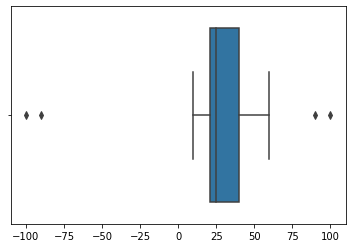

In [ ]:
## Box Plot
sns.boxplot(x = samples)
plt.show()


In [ ]:
### Z - Score = (x-xmean)/std
outliers = []
def detect_outliers(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)
  return outliers


In [ ]:
outlir_pts = detect_outliers(samples)
outlir_pts

[-100, -90]

Using IQR
1. Arrange the data in ascending order
2. Calculate the first quantile(25%)(q1)
3. Calculate the first quantile(75%)(q3)
4. Find IQR = q3 - q1
5. Find the lower bound = q1 - (1.5 * iqr)
6. Find the upper bound = q3 + (1.5 * iqr)

In [ ]:
dataset = sorted(samples)
q1,q3 = np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 - q1
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
print(lower,upper)

21.0 40.0
-7.5 68.5


In [ ]:
outliers = []
for i in dataset:
  if i>upper or i<lower:
    outliers.append(i)
outliers

[-100, -90, 90, 100]

In [ ]:
## Scatter Plot for age

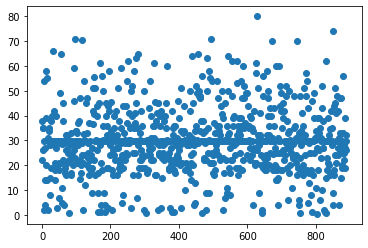

In [ ]:
plt.scatter(range(len(data['Age'])),data['Age'])
plt.show()